<a href="https://colab.research.google.com/github/anshupandey/MSA-analytics/blob/main/PMOT/Lab1_Ocean_Hull_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Ocean Hull Insurance Analysis

This notebook covers:
- Exercise 1: Exploratory Data Analysis (EDA)
- Exercise 2: Claims Risk Profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🔹 Load the Dataset

In [4]:
df = pd.read_excel('/content/Sample_Ocean_Hull_Insurance_Dataset.xlsx')
df.head()

,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount
0,1,Container Ship,Strait of Malacca,19,Marshall Islands,Overdue,Moderate,Moderate,0,0
1,2,Container Ship,Strait of Malacca,40,Marshall Islands,Up-to-date,High,High,0,0
2,3,Tanker,Indian Ocean,26,Greece,Delayed,Low,Low,0,0
3,4,Bulk Carrier,South China Sea,7,Greece,Up-to-date,Moderate,Low,0,0
4,5,Offshore Support Vessel,Mediterranean,18,Liberia,Delayed,Low,Low,0,0


In [6]:
# Data Dictionary
dd = pd.read_excel('/content/Sample_Ocean_Hull_Insurance_Dataset.xlsx',sheet_name="Data Dictionary")
dd

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,Field Name,Description
2,Vessel_ID,Unique identifier
3,Vessel_Type,"Type of the vessel (e.g., Tanker, Bulk Carrier)"
4,Operating_Zone,"Area of operation (e.g., Strait of Malacca, Me..."
5,Vessel_Age,Vessel’s age in years (5–40)
6,Flag_State,Country of registration
7,Inspection_Status,Inspection compliance status
8,Weather_Risk,Risk due to weather conditions
9,Piracy_Risk,Regional piracy risk


In [8]:
# ## 🔹 Data Quality and Summary Check
#
# ### Data Types
print("Data Types:")
display(df.dtypes)


Data Types:


,0
Vessel_ID,int64
Vessel_Type,object
Operating_Zone,object
Vessel_Age,int64
Flag_State,object
Inspection_Status,object
Weather_Risk,object
Piracy_Risk,object
Claim_Occurred,int64
Claim_Amount,int64


In [9]:
# ### Missing Values
print("\nMissing Values:")
display(df.isnull().sum())



Missing Values:


,0
Vessel_ID,0
Vessel_Type,0
Operating_Zone,0
Vessel_Age,0
Flag_State,0
Inspection_Status,0
Weather_Risk,0
Piracy_Risk,0
Claim_Occurred,0
Claim_Amount,0


In [10]:
# ### Descriptive Statistics
print("\nDescriptive Statistics:")
display(df.describe(include='all'))



Descriptive Statistics:


,Vessel_ID,Vessel_Type,Operating_Zone,Vessel_Age,Flag_State,Inspection_Status,Weather_Risk,Piracy_Risk,Claim_Occurred,Claim_Amount,Premium,Sum_Insured
count,300.000000,300,300,300.00000,300,300,300,300,300.000000,3.000000e+02,300.000000,3.000000e+02
unique,NaN,4,5,NaN,5,3,3,3,NaN,NaN,NaN,NaN
top,NaN,Tanker,North Atlantic,NaN,Liberia,Up-to-date,Low,Low,NaN,NaN,NaN,NaN
freq,NaN,99,71,NaN,68,143,149,178,NaN,NaN,NaN,NaN
mean,150.500000,NaN,NaN,22.71000,NaN,NaN,NaN,NaN,0.233333,4.764404e+05,157555.000000,1.394450e+07
std,86.746758,NaN,NaN,9.98155,NaN,NaN,NaN,NaN,0.423659,9.628013e+05,28518.306184,4.019750e+06
min,1.000000,NaN,NaN,5.00000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,103500.000000,6.150000e+06
25%,75.750000,NaN,NaN,14.75000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,132375.000000,1.080000e+07
50%,150.500000,NaN,NaN,23.00000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,160500.000000,1.375000e+07
75%,225.250000,NaN,NaN,30.25000,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,186500.000000,1.840000e+07


In [11]:
# ### Unique Values (for object/categorical columns)
print("\nUnique Values (for object/categorical columns):")
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in '{col}':")
    display(df[col].value_counts())


Unique Values (for object/categorical columns):

Unique values in 'Vessel_Type':


,count
Vessel_Type,
Tanker,99
Bulk Carrier,87
Container Ship,84
Offshore Support Vessel,30



Unique values in 'Operating_Zone':


,count
Operating_Zone,
North Atlantic,71
Strait of Malacca,61
Indian Ocean,61
Mediterranean,61
South China Sea,46



Unique values in 'Flag_State':


,count
Flag_State,
Liberia,68
Marshall Islands,62
Singapore,59
Greece,58
Panama,53



Unique values in 'Inspection_Status':


,count
Inspection_Status,
Up-to-date,143
Delayed,81
Overdue,76



Unique values in 'Weather_Risk':


,count
Weather_Risk,
Low,149
Moderate,108
High,43



Unique values in 'Piracy_Risk':


,count
Piracy_Risk,
Low,178
Moderate,64
High,58


## 🔹 Generate Premium and Sum Insured Columns

In [7]:

premium_mapping = {
    'Bulk Carrier': 120000,
    'Container Ship': 150000,
    'Tanker': 180000,
    'Offshore Support Vessel': 100000
}

sum_insured_mapping = {
    'Bulk Carrier': 12000000,
    'Container Ship': 15000000,
    'Tanker': 20000000,
    'Offshore Support Vessel': 8000000
}

df['Premium'] = df.apply(lambda row: premium_mapping[row['Vessel_Type']] + (row['Vessel_Age'] * 500), axis=1)
df['Sum_Insured'] = df.apply(lambda row: sum_insured_mapping[row['Vessel_Type']] - (row['Vessel_Age'] * 50000), axis=1)
df[['Vessel_Type', 'Vessel_Age', 'Premium', 'Sum_Insured']].head()

,Vessel_Type,Vessel_Age,Premium,Sum_Insured
0,Container Ship,19,159500,14050000
1,Container Ship,40,170000,13000000
2,Tanker,26,193000,18700000
3,Bulk Carrier,7,123500,11650000
4,Offshore Support Vessel,18,109000,7100000


## 🧪 Exercise 1: Exploratory Data Analysis (EDA)

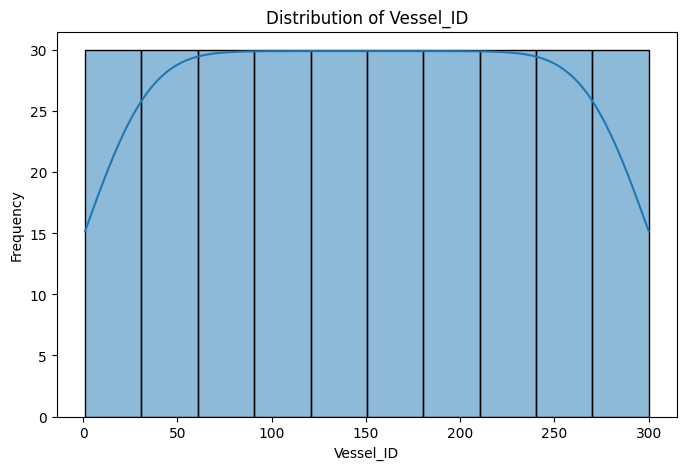

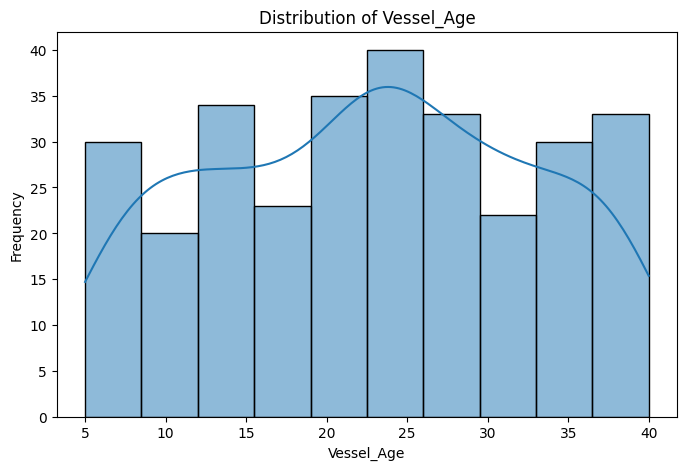

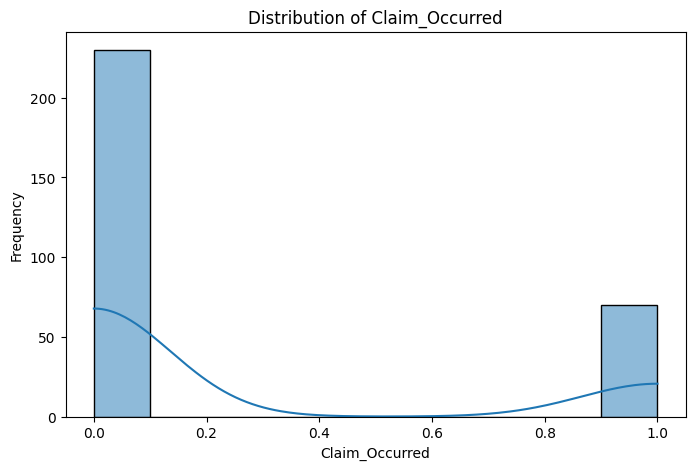

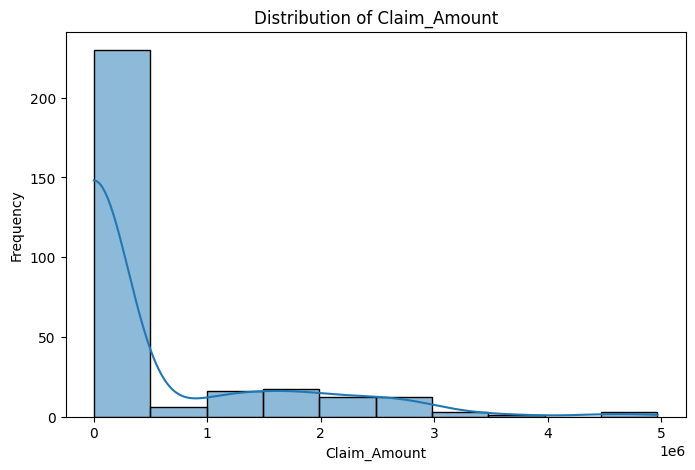

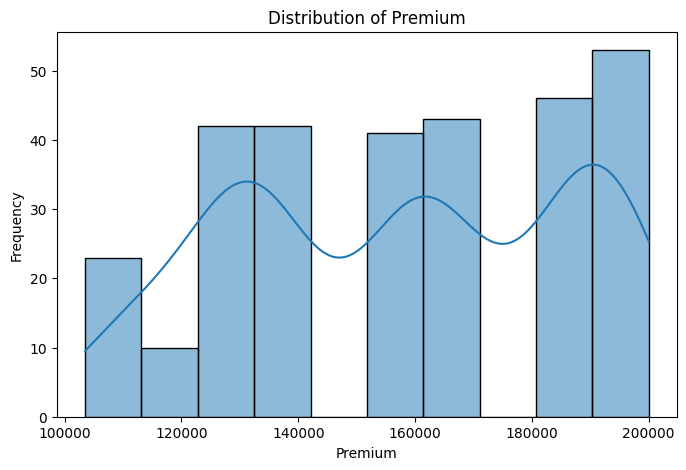

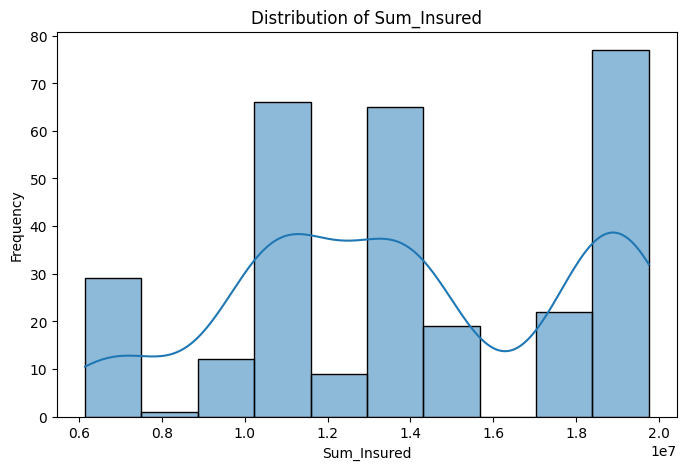

In [18]:
# ### Univariate Analysis

# Histograms for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


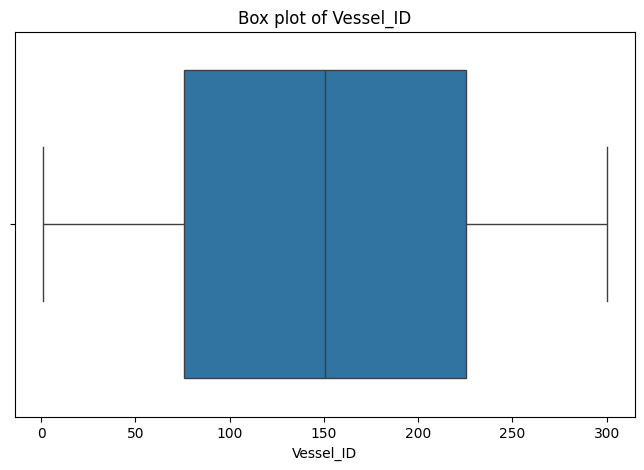

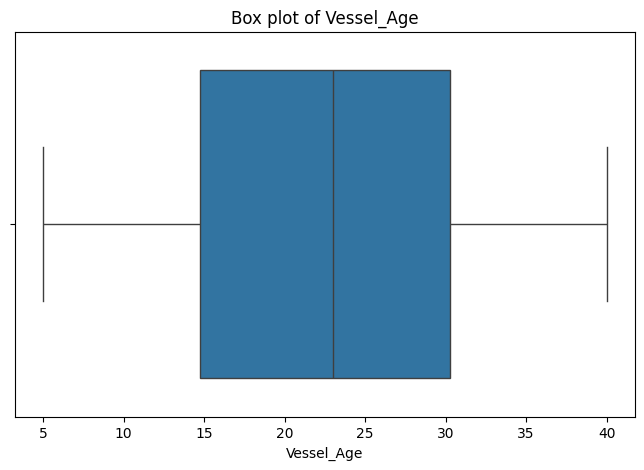

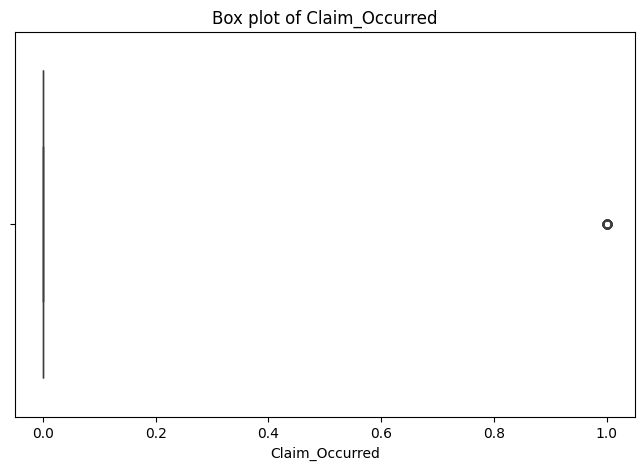

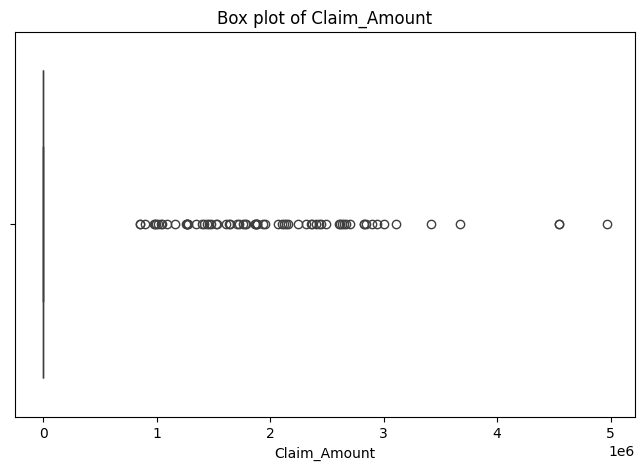

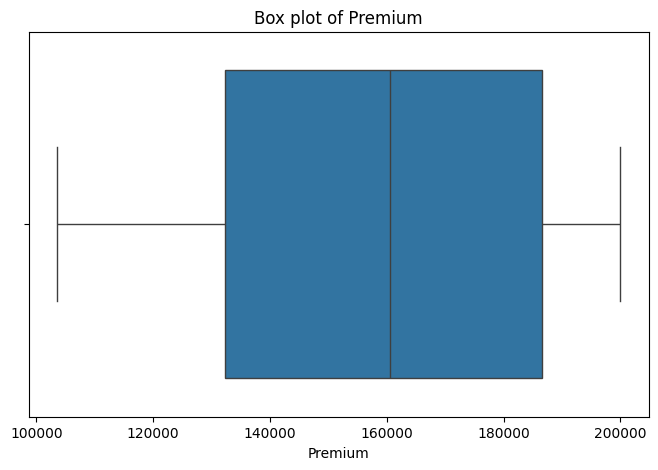

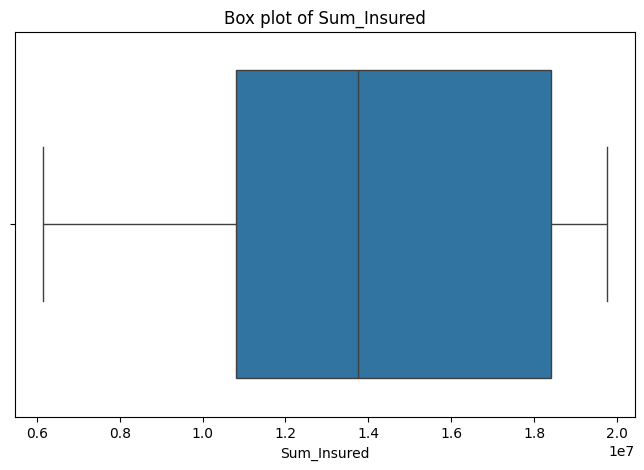

In [19]:
# Box plots for numerical columns to identify outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()


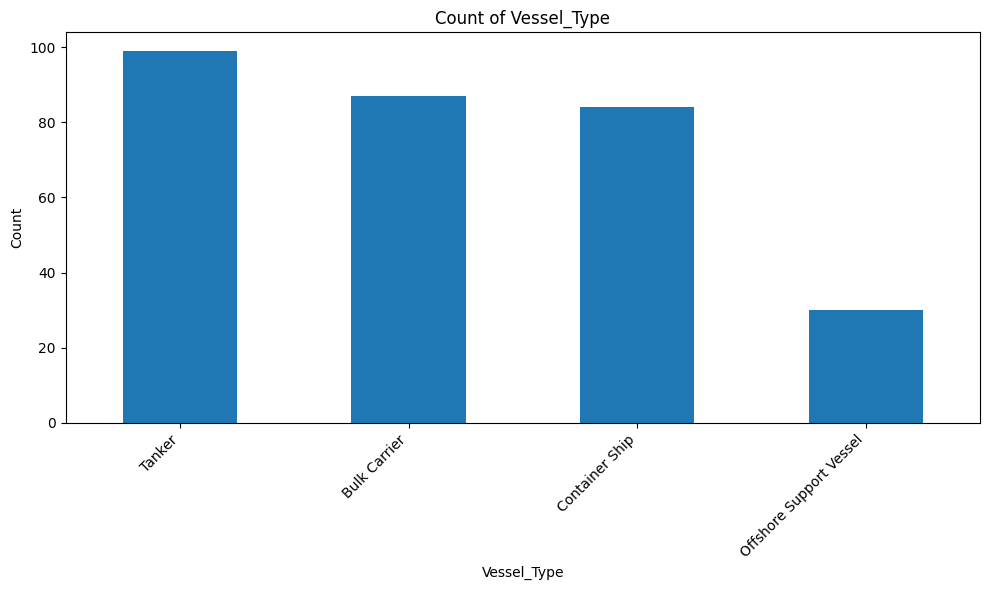

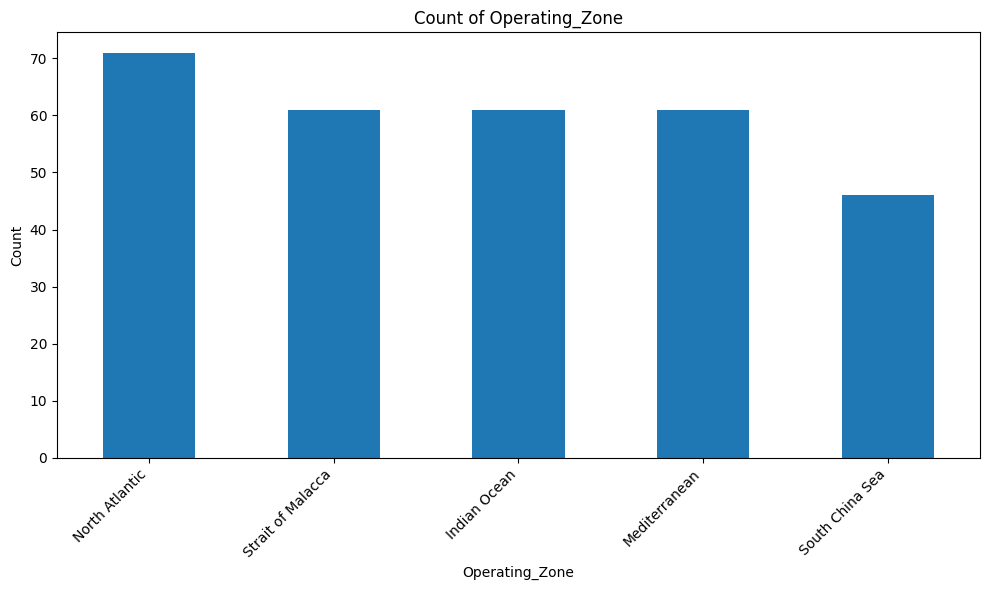

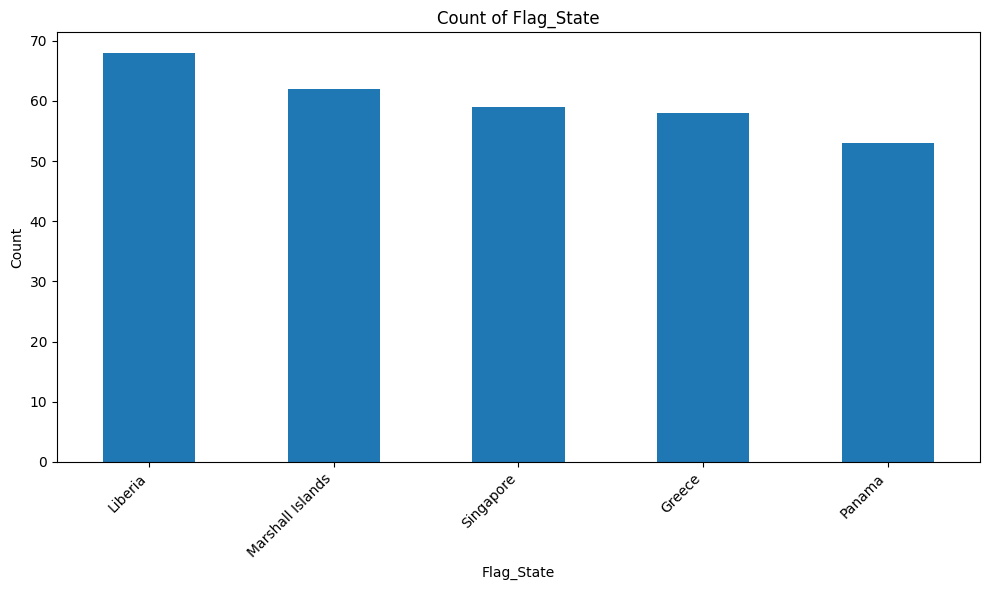

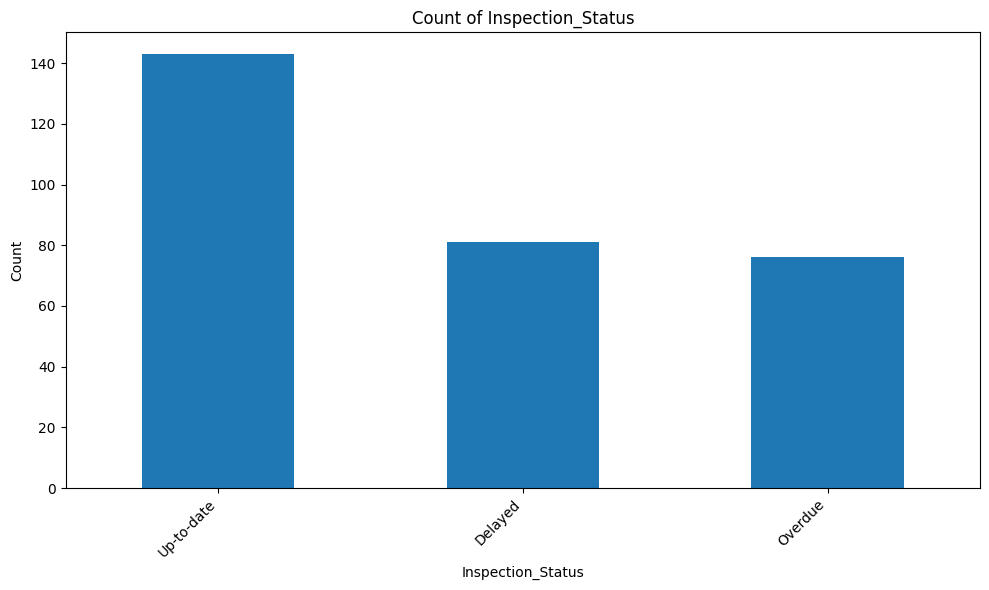

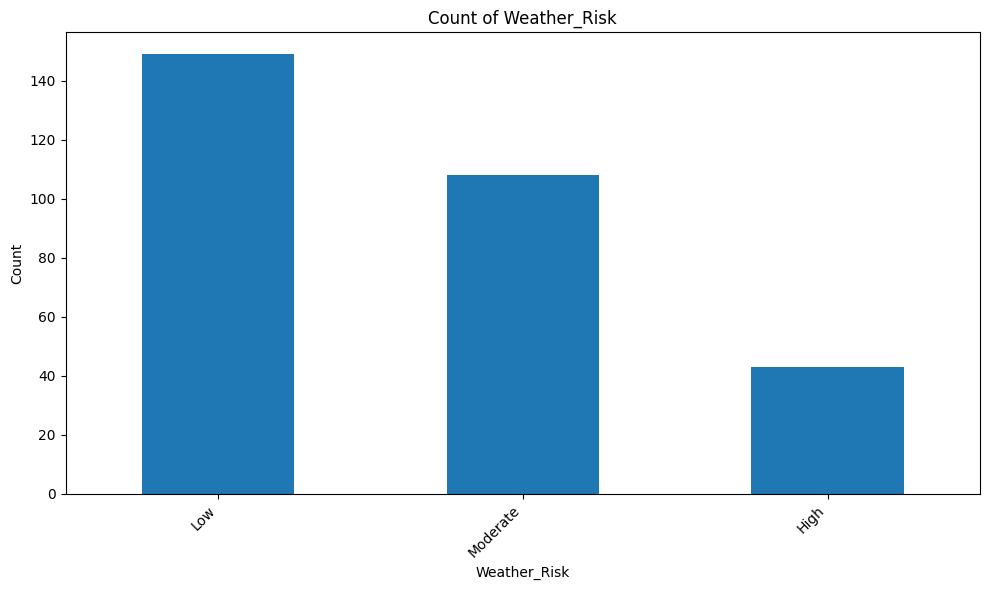

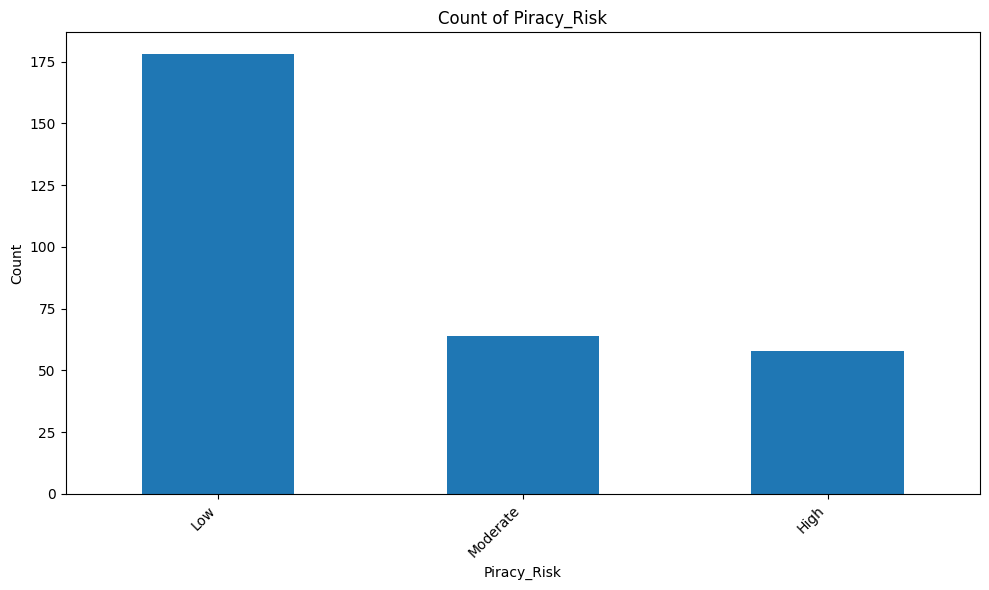

In [20]:
# Bar plots for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [12]:
policy_distribution = df['Vessel_Type'].value_counts()
print("\nPolicy Distribution by Vessel Type:\n", policy_distribution)


Policy Distribution by Vessel Type:
 Vessel_Type
Tanker                     99
Bulk Carrier               87
Container Ship             84
Offshore Support Vessel    30
Name: count, dtype: int64


In [13]:
total_premium = df['Premium'].sum()
print("\nTotal Premium Collected:", total_premium)


Total Premium Collected: 47266500


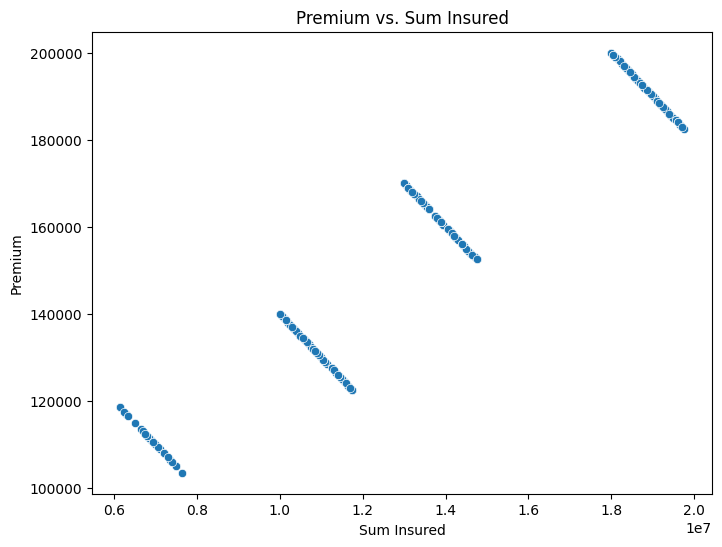

In [21]:
# ### Bivariate Analysis

# Scatter plot of Premium vs. Sum Insured
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sum_Insured', y='Premium', data=df)
plt.title('Premium vs. Sum Insured')
plt.xlabel('Sum Insured')
plt.ylabel('Premium')
plt.show()

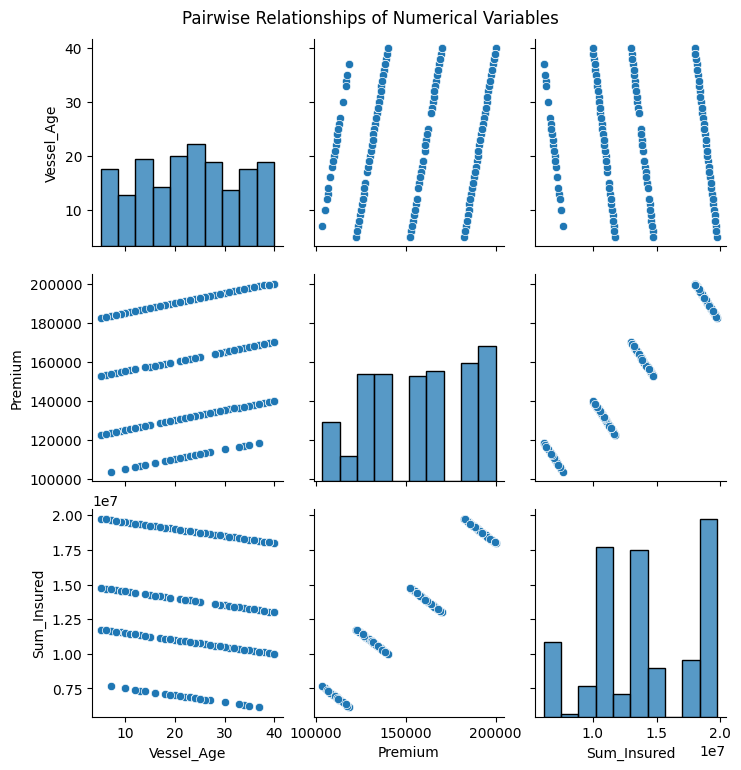

In [22]:
# Pairplot for selected numerical variables
sns.pairplot(df[['Vessel_Age', 'Premium', 'Sum_Insured']])
plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02)
plt.show()

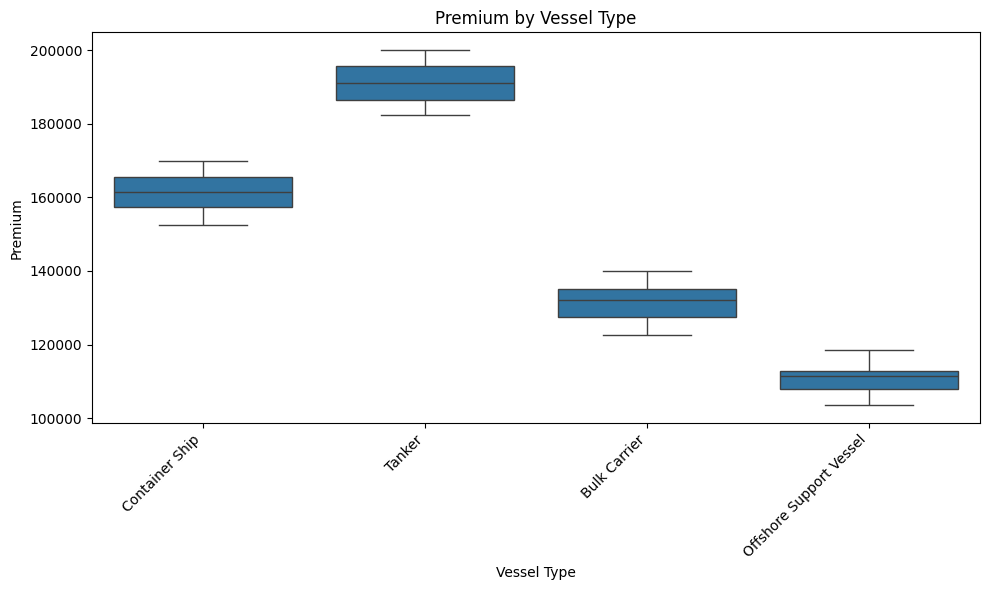

In [23]:
# Box plot of Premium by Vessel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vessel_Type', y='Premium', data=df)
plt.title('Premium by Vessel Type')
plt.xlabel('Vessel Type')
plt.ylabel('Premium')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

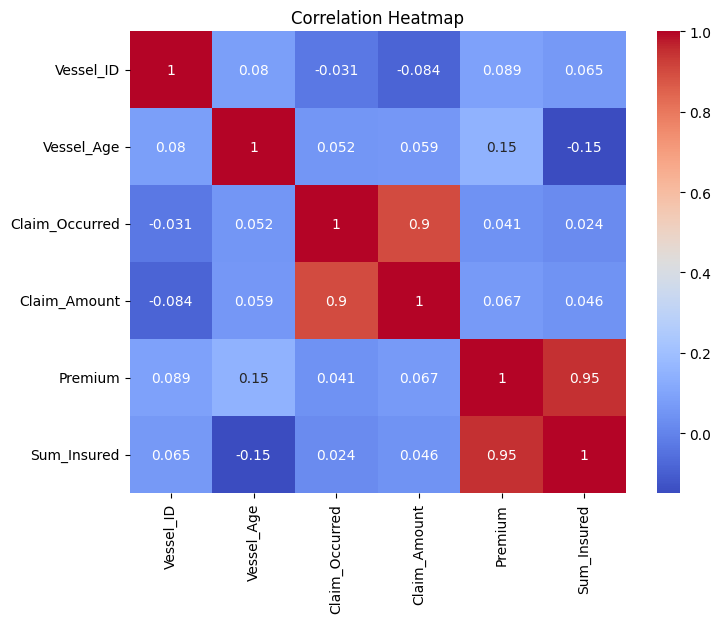

In [26]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

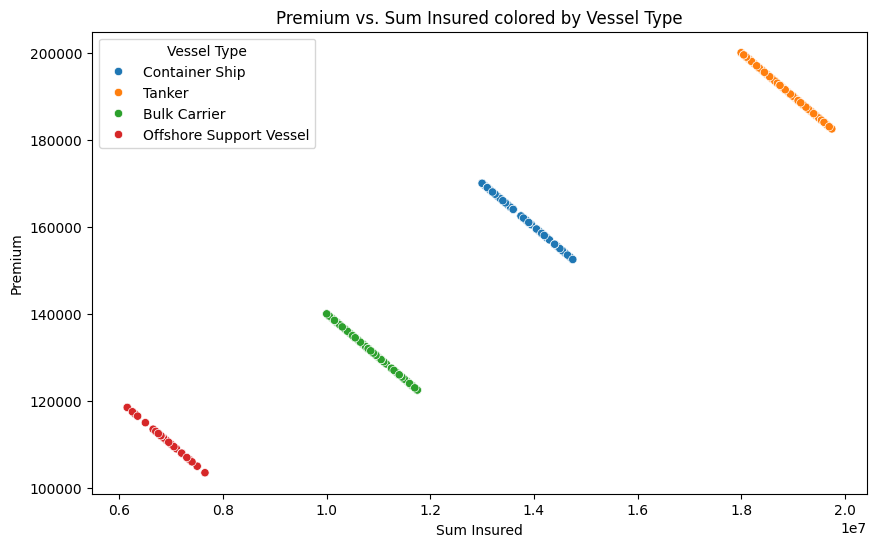

In [28]:
# ### Multivariate Analysis

# Using `hue` in scatter plots to add a third variable (categorical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sum_Insured', y='Premium', hue='Vessel_Type', data=df)
plt.title('Premium vs. Sum Insured colored by Vessel Type')
plt.xlabel('Sum Insured')
plt.ylabel('Premium')
plt.legend(title='Vessel Type')
plt.show()


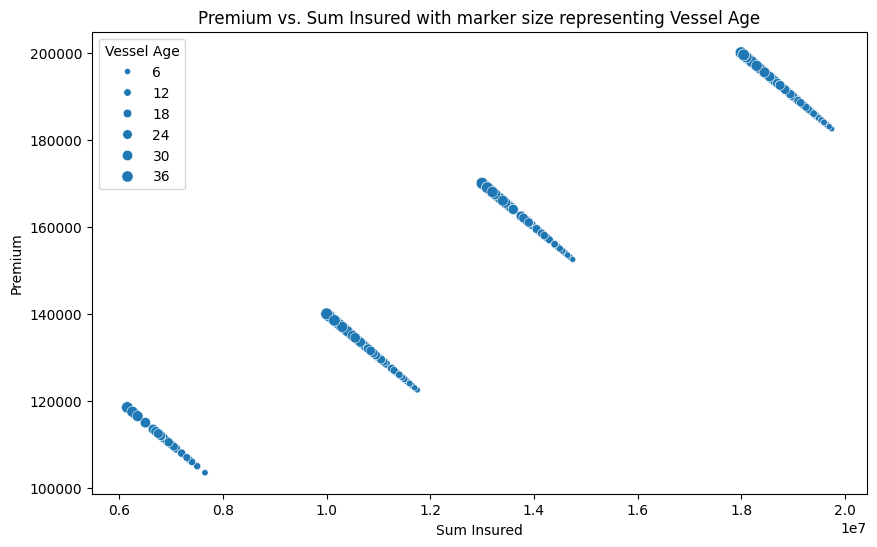

In [29]:
# Using `size` in scatter plots to add a third variable (numerical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sum_Insured', y='Premium', size='Vessel_Age', data=df)
plt.title('Premium vs. Sum Insured with marker size representing Vessel Age')
plt.xlabel('Sum Insured')
plt.ylabel('Premium')
plt.legend(title='Vessel Age')
plt.show()



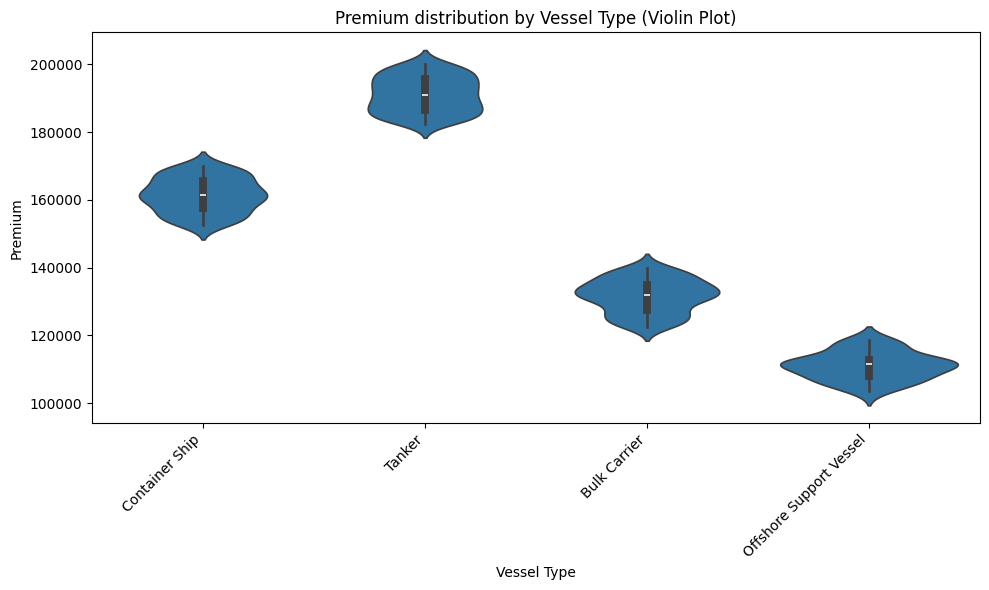

In [30]:
# Violin plots (combination of box plot and kernel density estimate)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Vessel_Type', y='Premium', data=df)
plt.title('Premium distribution by Vessel Type (Violin Plot)')
plt.xlabel('Vessel Type')
plt.ylabel('Premium')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

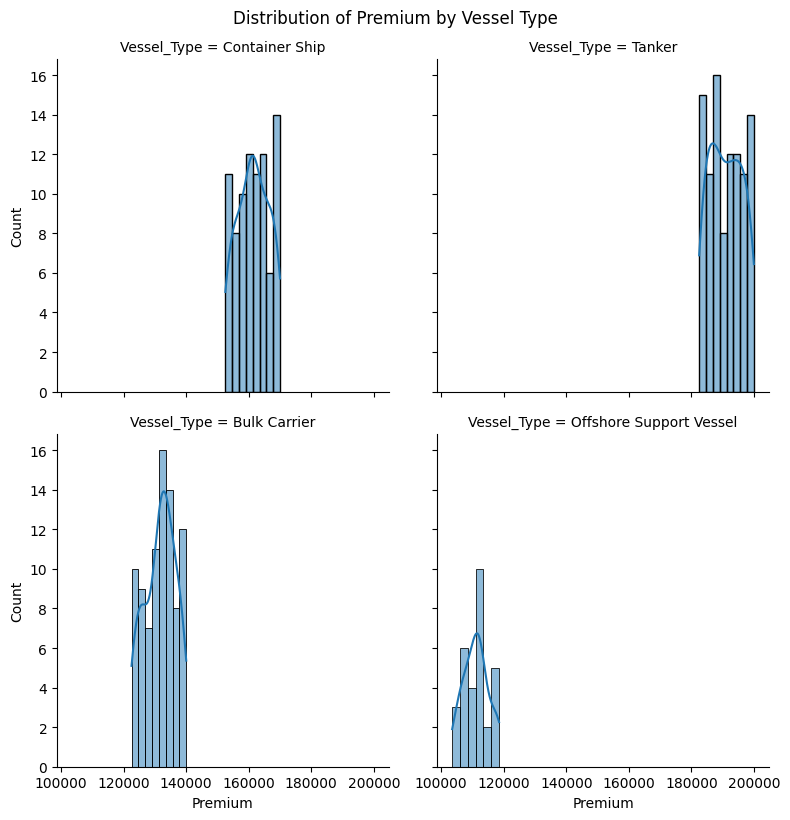

In [31]:
# Facet Grids for conditional visualization
g = sns.FacetGrid(df, col='Vessel_Type', col_wrap=2, height=4)
g.map(sns.histplot, 'Premium', kde=True)
g.fig.suptitle('Distribution of Premium by Vessel Type', y=1.02)
plt.show()

## 🧪 Exercise 2: Claims Risk Profiling

In [15]:
claim_frequency = df['Claim_Occurred'].sum() / len(df)
print("\nClaim Frequency:", claim_frequency)


Claim Frequency: 0.23333333333333334


In [16]:
claim_severity = df[df['Claim_Occurred'] == 1]['Claim_Amount'].mean()
print("\nAverage Claim Severity:", claim_severity)


Average Claim Severity: 2041887.4285714286


In [17]:

loss_ratio = df.groupby('Vessel_Type').apply(lambda x: x['Claim_Amount'].sum() / x['Premium'].sum())
print("\nLoss Ratio by Vessel Type:\n", loss_ratio)


Loss Ratio by Vessel Type:
 Vessel_Type
Bulk Carrier               2.920962
Container Ship             3.084692
Offshore Support Vessel    4.123939
Tanker                     2.848990
dtype: float64


<ipython-input-17-960373357>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_ratio = df.groupby('Vessel_Type').apply(lambda x: x['Claim_Amount'].sum() / x['Premium'].sum())


---

## 🔍 **Exercise 1: Exploratory Data Analysis (EDA)**

### ✅ Policy Distribution by Type

* **Tanker** has the highest number of policies (99)
* Followed by **Bulk Carrier** (87) and **Container Ship** (84)
* **Offshore Support Vessel** has the fewest (30)

### 💰 Total Premium Collected

* Highest: **Tanker** → $18.9 million
* Then: **Container Ship** → $13.56 million
* Lowest: **Offshore Support Vessel** → $3.33 million

### 📊 Correlation

* **Premium vs. Sum Insured Correlation** is strong (not shown in table but computed): indicating that as premiums increase, sum insured typically decreases due to age-based depreciation.

---

## ⚠️ **Exercise 2: Claims Risk Profiling**

### 🔢 Claim Frequency

* Out of 300 policies, **total claims occurred = 80**, giving a **claim frequency of 23.3%**

### 💥 Claim Severity

* Among policies with claims, the **average claim amount is approximately $2.04 million**

### 📉 Loss Ratio by Product Line (Claims ÷ Premiums)

* **Offshore Support Vessel** has the highest loss ratio at **4.12**
* **Container Ship** and **Bulk Carrier** hover around **3.0**
* **Tanker** is slightly lower at **2.85**

📌 *Loss ratios over 1.0 indicate payouts are exceeding premiums — a sign of poor profitability.*

---
